# Real and Fake product image detection

### Import Keras and tensorflow

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [45]:
#pip install keras
#pip install tensorflow

from keras.models import Sequential
from keras.layers import Conv2D, Flatten, Dense,MaxPool2D
import numpy as np
from keras.preprocessing import image
from keras.callbacks import EarlyStopping, ModelCheckpoint
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
try:
    from tensorflow.python.util import module_wrapper as deprecation
except ImportError:
    from tensorflow.python.util import deprecation_wrapper as deprecation
deprecation._PER_MODULE_WARNING_LIMIT = 0

### Dataset import with image generator function

In [65]:
# import dataset using the generator function
n_batch = 128
trainset_datagenerator = ImageDataGenerator(
    rescale=1./255,
    rotation_range=10.,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True)

testset_datagenerator = ImageDataGenerator(rescale = 1./255)

training_image_set = trainset_datagenerator.flow_from_directory('product/training',
                                                 target_size=(128,128),
                                                 batch_size =n_batch,
                                                 class_mode = 'binary')

testing_image_set = testset_datagenerator.flow_from_directory('product/test',
                                            target_size=(128,128),
                                            batch_size =n_batch,
                                            class_mode = 'binary')

Found 144 images belonging to 2 classes.
Found 144 images belonging to 2 classes.


In [85]:
train_labels = training_image_set.labels
print(train_labels)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


In [87]:
x = training_image_set
print(x)

In [ ]:
y = training_image_set.target
print(y)

### Plot between instance and class

Text(0.5, 1.0, 'View Plot between instance and class')

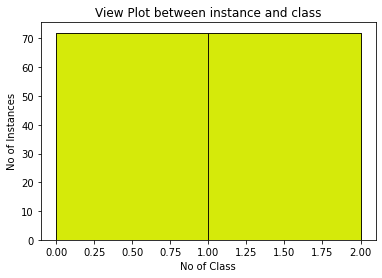

In [47]:
# Plot the chart between the number of instances and the no of class
p1 = plt.hist(training_image_set.classes, bins=range(0,3), alpha=0.8, color='green', edgecolor='black')
p2 = plt.hist(testing_image_set.classes,  bins=range(0,3), alpha=0.8, color='yellow', edgecolor='black')
plt.ylabel('No of Instances')
plt.xlabel('No of Class')
plt.title('View Plot between instance and class')

### Verify the data

(128, 128, 128, 3) (128,)


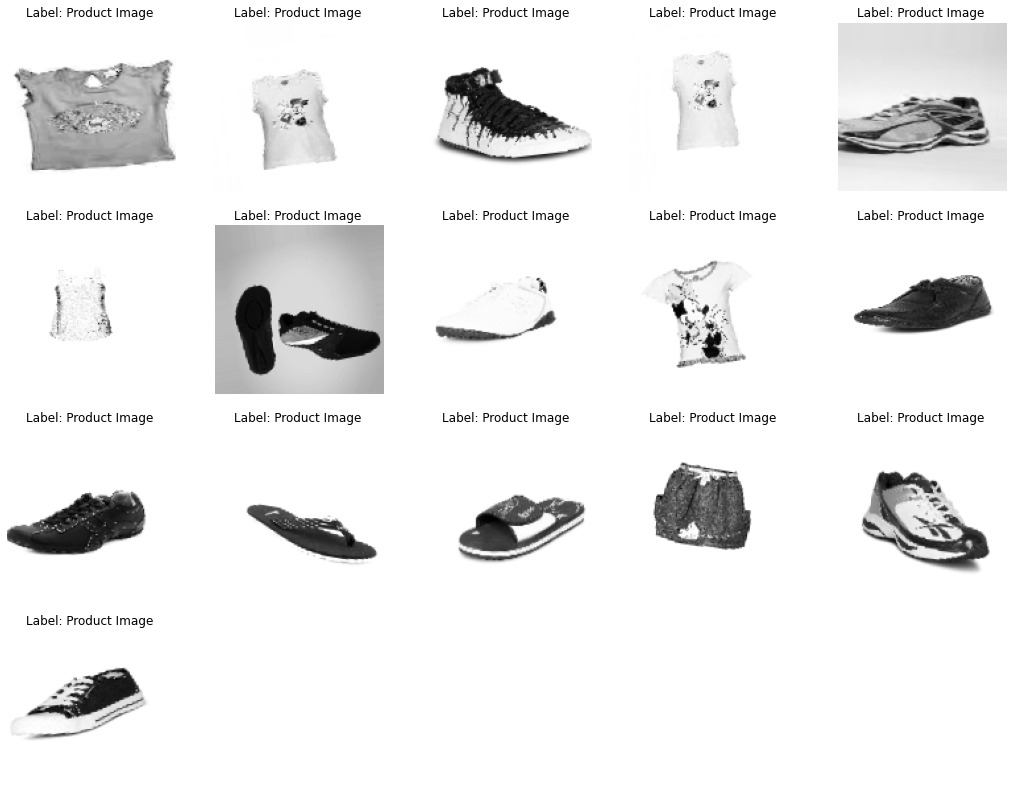

In [48]:
# To verify that the dataset looks correct, let's plot the few images from the training set and display the class name below each image:
for P, q in training_image_set:
    print(P.shape, q.shape)
    plt.figure(figsize=(18,18))
    for K in range(16):
        plt.subplot(5,5,K+1)
        plt.axis('off')
        plt.title('Label: Product Image ')
        product_image = np.uint8(255*P[K,:,:,0])
        plt.imshow(product_image, cmap='gray')
    break

## Here, sequential model has been building

code below define the convolutional base using a common pattern

In [49]:
# The lines of code below define the convolutional base using a common pattern: a stack of Conv2D and MaxPooling2D layers.


model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(128, kernel_size=(3, 3),activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))

# Add Dense layers on top
model.add(Flatten())
model.add(Dense(activation="relu", units=256))
model.add(Dense(activation="sigmoid", units=1))

In [50]:
# Checking model summary and the complete architecture of your model:

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 126, 126, 32)      896       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 63, 63, 32)       0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 61, 61, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 30, 30, 64)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 14, 14, 128)     

### Compile  and train the model

Metrics
This for log, we choose accuracy .

In [51]:
# here, the created sequential model has been compiled to calculate the loss as well as accuracy
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Train the model process has been start here to evaluate that the created model can be used further in real time within the application.

In [52]:
train_model = [
    EarlyStopping(monitor='val_loss', patience=10),
    ModelCheckpoint(filepath='/content/drive/MyDrive/product/model.h5', monitor='val_loss', save_best_only=True, mode ='max'),
]

In [53]:
training_labels = training_image_set.class_indices
#testing_labels = testing_image_set.class_indices
print(training_labels)

{'fake': 0, 'real': 1}


In [54]:
# hist = model.fit(
#         training_image_set,
#         steps_per_epoch=80,
#         epochs=80,
#         validation_data=testing_image_set,
#         validation_steps=28,
#         callbacks = train_model
#     )

In [55]:
history = model.fit(training_image_set, epochs=10, 
                    validation_data=(training_image_set))

Epoch 1/20
2/2 [==============================] - 40s 21s/step - loss: 0.8549 - accuracy: 0.5139 - val_loss: 0.6964 - val_accuracy: 0.5069
Epoch 2/20
2/2 [==============================] - 25s 23s/step - loss: 0.7543 - accuracy: 0.4861 - val_loss: 0.7093 - val_accuracy: 0.5000
Epoch 3/20
2/2 [==============================] - 25s 23s/step - loss: 0.7044 - accuracy: 0.4583 - val_loss: 0.6958 - val_accuracy: 0.5000
Epoch 4/20
2/2 [==============================] - 25s 12s/step - loss: 0.6933 - accuracy: 0.5069 - val_loss: 0.7186 - val_accuracy: 0.5000
Epoch 5/20
2/2 [==============================] - 24s 23s/step - loss: 0.7015 - accuracy: 0.5000 - val_loss: 0.6925 - val_accuracy: 0.5139
Epoch 6/20
2/2 [==============================] - 25s 23s/step - loss: 0.6920 - accuracy: 0.5139 - val_loss: 0.6916 - val_accuracy: 0.5139
Epoch 7/20
2/2 [==============================] - 24s 11s/step - loss: 0.6911 - accuracy: 0.5208 - val_loss: 0.6893 - val_accuracy: 0.5556
Epoch 8/20
2/2 [===========

### Evaluate the model

Text(0.5, 1.0, 'Training - Loss Function')

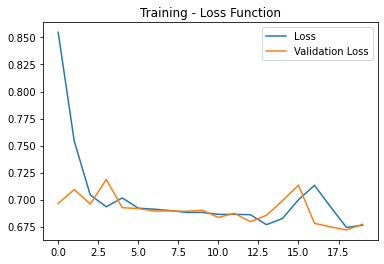

In [56]:
# Plot the figure for loss and the validation loss
plt.figure(0)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')


Text(0.5, 1.0, 'Train - Accuracy')

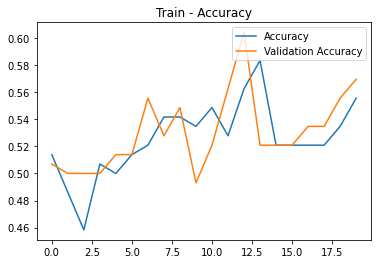

In [57]:
# plot the figure for accuracy and validation accuracy
plt.figure(1)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend(loc = 'upper right')
plt.title('Train - Accuracy')

In [81]:
# Display the accuracy obtained
test_loss, test_acc = model.evaluate(testing_image_set, verbose=2)
print(test_acc)


2/2 - 11s - loss: 0.6679 - accuracy: 0.5069 - 11s/epoch - 5s/step
0.5069444179534912


## Prediction process completed and ready to detect fake or real image

In [109]:
from keras.utils import image_utils

In [112]:
def product_image_Prediction(loc):
    testing_product_image = image_utils.load_img(loc, target_size = (128,128))
    plt.axis('off')
    plt.imshow(testing_product_image)
    testing_product_image = image_utils.img_to_array(testing_product_image)
    testing_product_image = np.expand_dims(testing_product_image, axis =0)
    outcome = model.predict(testing_product_image)
    if outcome[0][0] == 1:
        predictions = 'This Product is Real'
    else:
        predictions = 'This Product is Fake'
    print('Prediction Result: ',predictions)

Please enter product image path to check weather it is real or fake: product/test/fake/2732.jpg
1/1 [==============================] - 4s 4s/step
Prediction Result:  This Product is Fake


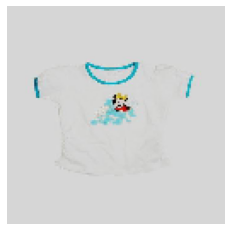

In [113]:
product_image_path = input("Please enter product image path to check weather it is real or fake: ")
test_image_1 = product_image_Prediction(product_image_path)
# product/test/fake/2732.jpg

Please enter product image path to check weather it is real or fake: product/test/fake/2732.jpg
1/1 [==============================] - 0s 63ms/step
Prediction Result:  This Product is Fake


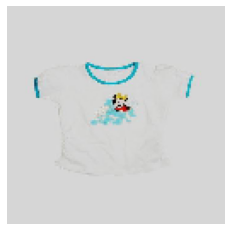

In [115]:
product_image_path = input("Please enter product image path to check weather it is real or fake: ")
test_image_2 = product_image_Prediction(product_image_path)

Please enter product image path to check weather it is real or fake: product/test/fake/2742.jpg
1/1 [==============================] - 0s 31ms/step
Prediction Result:  This Product is Fake


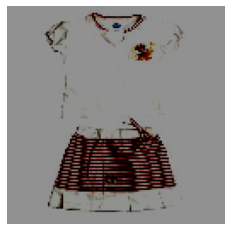

In [116]:
product_image_path = input("Please enter product image path to check weather it is real or fake: ")
test_image_3 = product_image_Prediction(product_image_path)